In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


In [2]:

data=pd.read_csv(r'C:\Users\HP\Desktop\iNeron.ai\Attended_class\iNeuron_internship\notebooks\data\tour_package.csv')

In [3]:

data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:

data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
data=data.drop("CustomerID",axis=1)

In [6]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# As we have seen in the EDA, that we need to handle the Gender and MeritalStatus column. 

In [7]:
data["Gender"]=np.where(data["Gender"]=="Fe Male","Female",data["Gender"])
data["MaritalStatus"]=np.where(data["MaritalStatus"]=="Single","Unmarried",data["MaritalStatus"])

In [8]:
X=data.drop(labels=["ProdTaken"],axis=1)
y=data["ProdTaken"]

In [9]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [11]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

In [12]:
X_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
924,NaN,Self Enquiry,1,12.0,Salaried,Male,3,3.0,Basic,3.0,Divorced,1.0,1,3,1,1.0,Executive,18506.0
3036,48.0,Self Enquiry,1,9.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Divorced,3.0,1,4,1,NaN,AVP,35430.0
3790,46.0,Self Enquiry,1,32.0,Salaried,Female,4,5.0,Deluxe,3.0,Married,2.0,0,4,0,1.0,Manager,24584.0
4366,46.0,Self Enquiry,3,9.0,Salaried,Male,4,4.0,Deluxe,4.0,Married,2.0,0,5,1,3.0,Manager,23483.0
1014,31.0,Self Enquiry,1,14.0,Salaried,Female,3,3.0,Super Deluxe,4.0,Unmarried,4.0,0,1,1,0.0,AVP,31422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,51.0,Company Invited,3,19.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,5.0,1,3,1,2.0,Manager,35558.0
919,59.0,Self Enquiry,1,24.0,Small Business,Male,3,3.0,Standard,3.0,Unmarried,7.0,0,3,1,1.0,Senior Manager,25512.0
500,32.0,Self Enquiry,1,15.0,Salaried,Female,3,3.0,Deluxe,3.0,Divorced,2.0,1,5,1,2.0,Manager,21322.0
3885,57.0,Company Invited,1,7.0,Salaried,Male,3,4.0,Deluxe,3.0,Married,3.0,0,3,0,1.0,Manager,24984.0


In [13]:
y_train

924     0
3036    0
3790    0
4366    0
1014    0
       ..
4859    1
919     0
500     0
3885    0
4517    0
Name: ProdTaken, Length: 3910, dtype: int64

In [14]:
# Selecting the categorical columns and numerical columns

categorical_cols=X.select_dtypes(include='object').columns

numerical_cols=X.select_dtypes(exclude='object').columns

In [15]:
numerical_cols

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [16]:
categorical_cols

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [17]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
num_pipeline=Pipeline(steps=[
    ("Imputer",SimpleImputer(strategy="mean")),
    ("Scaling",StandardScaler())
])

In [19]:
cat_pipeline=Pipeline(steps=[
    ("imputing",SimpleImputer(strategy="most_frequent")),
    ("Encoding",OneHotEncoder())
])

In [20]:
num_pipeline

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaling', StandardScaler())])

In [21]:
cat_pipeline

Pipeline(steps=[('imputing', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder())])

In [22]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [23]:
preprocessor.fit_transform(X_train)

array([[-7.76124094e-16, -7.15120148e-01, -4.21181320e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.12386516e+00, -7.15120148e-01, -7.86224793e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.05405649e-01, -7.15120148e-01,  2.01244184e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.23810930e-01, -7.15120148e-01, -5.61378463e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.10693296e+00, -7.15120148e-01, -1.02958711e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.05405649e-01, -7.15120148e-01, -7.86224793e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [24]:
preprocessor.transform(X_test)

array([[-0.84227044, -0.71512015,  2.37748531, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29612166, -0.71512015, -1.02958711, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.54385198, -0.71512015, -0.177819  , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.29612166, -0.71512015, -0.29950016, ...,  1.        ,
         0.        ,  0.        ],
       [-0.07766215,  0.37498503,  0.06554331, ...,  0.        ,
         0.        ,  0.        ],
       [-0.73304069, -0.71512015, -0.66454364, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
preprocessor.get_feature_names_out()

array(['num_pipeline__Age', 'num_pipeline__CityTier',
       'num_pipeline__DurationOfPitch',
       'num_pipeline__NumberOfPersonVisiting',
       'num_pipeline__NumberOfFollowups',
       'num_pipeline__PreferredPropertyStar',
       'num_pipeline__NumberOfTrips', 'num_pipeline__Passport',
       'num_pipeline__PitchSatisfactionScore', 'num_pipeline__OwnCar',
       'num_pipeline__NumberOfChildrenVisiting',
       'num_pipeline__MonthlyIncome',
       'cat_pipeline__TypeofContact_Company Invited',
       'cat_pipeline__TypeofContact_Self Enquiry',
       'cat_pipeline__Occupation_Free Lancer',
       'cat_pipeline__Occupation_Large Business',
       'cat_pipeline__Occupation_Salaried',
       'cat_pipeline__Occupation_Small Business',
       'cat_pipeline__Gender_Female', 'cat_pipeline__Gender_Male',
       'cat_pipeline__ProductPitched_Basic',
       'cat_pipeline__ProductPitched_Deluxe',
       'cat_pipeline__ProductPitched_King',
       'cat_pipeline__ProductPitched_Standard',
   

In [26]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [27]:
X_train

,num_pipeline__Age,num_pipeline__CityTier,num_pipeline__DurationOfPitch,num_pipeline__NumberOfPersonVisiting,num_pipeline__NumberOfFollowups,num_pipeline__PreferredPropertyStar,num_pipeline__NumberOfTrips,num_pipeline__Passport,num_pipeline__PitchSatisfactionScore,num_pipeline__OwnCar,...,cat_pipeline__ProductPitched_Standard,cat_pipeline__ProductPitched_Super Deluxe,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Unmarried,cat_pipeline__Designation_AVP,cat_pipeline__Designation_Executive,cat_pipeline__Designation_Manager,cat_pipeline__Designation_Senior Manager,cat_pipeline__Designation_VP
0,-7.761241e-16,-0.71512,-0.421181,0.134642,-0.696984,-0.728948,-1.217445,1.57339,-0.040232,0.782966,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.123865e+00,-0.71512,-0.786225,0.134642,0.295923,-0.728948,-0.128950,1.57339,0.688040,0.782966,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,9.054056e-01,-0.71512,2.012442,1.512784,1.288830,-0.728948,-0.673198,-0.63557,0.688040,-1.277194,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,9.054056e-01,1.46509,-0.786225,1.512784,0.295923,0.530350,-0.673198,-0.63557,1.416312,0.782966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-7.330407e-01,-0.71512,-0.177819,0.134642,-0.696984,0.530350,0.415298,-0.63557,-1.496776,0.782966,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.451554e+00,1.46509,0.430587,0.134642,0.295923,-0.728948,0.959546,1.57339,-0.040232,0.782966,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3906,2.325392e+00,-0.71512,1.038993,0.134642,-0.696984,-0.728948,2.048042,-0.63557,-0.040232,0.782966,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3907,-6.238109e-01,-0.71512,-0.056138,0.134642,-0.696984,-0.728948,-0.673198,1.57339,1.416312,0.782966,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3908,2.106933e+00,-0.71512,-1.029587,0.134642,0.295923,-0.728948,-0.128950,-0.63557,-0.040232,-1.277194,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_test

,num_pipeline__Age,num_pipeline__CityTier,num_pipeline__DurationOfPitch,num_pipeline__NumberOfPersonVisiting,num_pipeline__NumberOfFollowups,num_pipeline__PreferredPropertyStar,num_pipeline__NumberOfTrips,num_pipeline__Passport,num_pipeline__PitchSatisfactionScore,num_pipeline__OwnCar,...,cat_pipeline__ProductPitched_Standard,cat_pipeline__ProductPitched_Super Deluxe,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Unmarried,cat_pipeline__Designation_AVP,cat_pipeline__Designation_Executive,cat_pipeline__Designation_Manager,cat_pipeline__Designation_Senior Manager,cat_pipeline__Designation_VP
0,-0.842270,-0.715120,2.377485e+00,1.512784,0.295923,-0.728948,1.503794,-0.63557,1.416312,0.782966,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.296122,-0.715120,-1.029587e+00,0.134642,1.288830,-0.728948,-0.128950,1.57339,-0.768504,-1.277194,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.543852,-0.715120,-1.778190e-01,0.134642,0.295923,1.789649,2.048042,-0.63557,1.416312,-1.277194,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.359257,-0.715120,-7.862248e-01,0.134642,0.295923,1.789649,1.503794,-0.63557,0.688040,0.782966,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.279189,-0.715120,1.890761e+00,-1.243500,1.288830,-0.728948,-0.673198,-0.63557,-1.496776,-1.277194,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0.796176,-0.715120,-2.161492e-16,-1.243500,-0.696984,-0.728948,0.959546,1.57339,-0.040232,-1.277194,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
974,-0.951500,-0.715120,1.525717e+00,0.134642,0.295923,-0.728948,-0.128950,-0.63557,-1.496776,-1.277194,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
975,-0.296122,-0.715120,-2.995002e-01,0.134642,1.288830,0.530350,2.592289,-0.63557,-0.040232,-1.277194,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
976,-0.077662,0.374985,6.554331e-02,0.134642,0.295923,-0.728948,-0.128950,-0.63557,-1.496776,0.782966,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
models={
    "Logistic_Regression":LogisticRegression(),
    "Random_Forest_Classifier":RandomForestClassifier(),
    "Naive_Bayes_Classifier":GaussianNB(),
    "Decision_Tree_Classifier":DecisionTreeClassifier(),
    "Support_Vector_Machine":SVC(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

In [30]:
list(models)

['Logistic_Regression',
 'Random_Forest_Classifier',
 'Naive_Bayes_Classifier',
 'Decision_Tree_Classifier',
 'Support_Vector_Machine',
 'KNeighborsClassifier',
 'AdaBoostClassifier']

In [31]:
from sklearn.metrics import f1_score,classification_report,accuracy_score

In [51]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    test_acc_report={}
    train_acc_report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        #Make predictions
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)

        # Evaluate train and test data
        train_report=classification_report(y_train,y_train_pred)
        train_accuracy= accuracy_score(y_train,y_train_pred)


        test_report=classification_report(y_test,y_test_pred)
        test_accuracy=accuracy_score(y_test,y_test_pred)
        print(f"Model: {model} (Training data)")
        print(f"The accuracy of {model} on training data: {train_accuracy}")
        print(train_report)
        print('--------------------------------------------------------------------')
        print(f"Model: {model} (Test data)")
        print(f"The accuracy of {model} on test data: {test_accuracy}")
        print(test_report)
        print('='*40)
        print('\n')

        train_acc_report[model]=train_accuracy
        test_acc_report[model]=test_accuracy


    return train_acc_report, test_acc_report

        

        

In [52]:
train_results,test_results=evaluate_model(X_train,y_train,X_test,y_test,models)

Model: LogisticRegression() (Training data)
The accuracy of LogisticRegression() on training data: 0.8455242966751918
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3174
           1       0.71      0.30      0.42       736

    accuracy                           0.85      3910
   macro avg       0.78      0.64      0.67      3910
weighted avg       0.83      0.85      0.82      3910

--------------------------------------------------------------------
Model: LogisticRegression() (Test data)
The accuracy of LogisticRegression() on test data: 0.8404907975460123
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       794
           1       0.65      0.33      0.44       184

    accuracy                           0.84       978
   macro avg       0.75      0.64      0.67       978
weighted avg       0.82      0.84      0.82       978



Model: RandomForestClassifier() (Training data)

In [53]:
train_results

{LogisticRegression(): 0.8455242966751918,
 RandomForestClassifier(): 1.0,
 GaussianNB(): 0.8179028132992328,
 DecisionTreeClassifier(): 1.0,
 SVC(): 0.8915601023017903,
 KNeighborsClassifier(): 0.9493606138107417,
 AdaBoostClassifier(): 0.8544757033248082}

In [54]:
test_results

{LogisticRegression(): 0.8404907975460123,
 RandomForestClassifier(): 0.943762781186094,
 GaussianNB(): 0.8179959100204499,
 DecisionTreeClassifier(): 0.9274028629856851,
 SVC(): 0.8701431492842536,
 KNeighborsClassifier(): 0.8997955010224948,
 AdaBoostClassifier(): 0.8466257668711656}

In [55]:
train_score_data=pd.DataFrame({
    "Models":list(models),
    "train_Score":train_results.values()
})

In [56]:
train_score_data

,Models,train_Score
0,Logistic_Regression,0.845524
1,Random_Forest_Classifier,1.000000
2,Naive_Bayes_Classifier,0.817903
3,Decision_Tree_Classifier,1.000000
4,Support_Vector_Machine,0.891560
5,KNeighborsClassifier,0.949361
6,AdaBoostClassifier,0.854476


In [59]:
test_score_data=pd.DataFrame({
    "Models":list(models),
    "test_Score":test_results.values()
})

In [60]:
test_score_data

,Models,test_Score
0,Logistic_Regression,0.840491
1,Random_Forest_Classifier,0.943763
2,Naive_Bayes_Classifier,0.817996
3,Decision_Tree_Classifier,0.927403
4,Support_Vector_Machine,0.870143
5,KNeighborsClassifier,0.899796
6,AdaBoostClassifier,0.846626


In [62]:
score_data=test_score_data.sort_values("test_Score",ascending=False).reset_index()



In [63]:
score_data

,index,Models,test_Score
0,1,Random_Forest_Classifier,0.943763
1,3,Decision_Tree_Classifier,0.927403
2,5,KNeighborsClassifier,0.899796
3,4,Support_Vector_Machine,0.870143
4,6,AdaBoostClassifier,0.846626
5,0,Logistic_Regression,0.840491
6,2,Naive_Bayes_Classifier,0.817996


In [64]:
RandomForestClassifier_model = RandomForestClassifier()
RandomForestClassifier_model= RandomForestClassifier_model.fit(X_train,y_train)
y_pred=RandomForestClassifier_model.predict(X_test)

In [65]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
4722,0,0,0
2925,0,0,0
2855,0,0,0
3730,0,0,0
1512,1,1,0
...,...,...,...
2324,0,0,0
4076,0,0,0
2558,0,0,0
4841,1,1,0


Performing an ROC (Receiver Operating Characteristic) curve is a common way to visualize the performance of a binary classification model. The ROC curve plots the true positive rate (Sensitivity) against the false positive rate (1 - Specificity) at various threshold settings. A perfect classifier would have an ROC curve that passes through the top-left corner.

In [66]:
y_pred_prob = RandomForestClassifier_model.predict_proba(X_test)[:, 1]

In [67]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

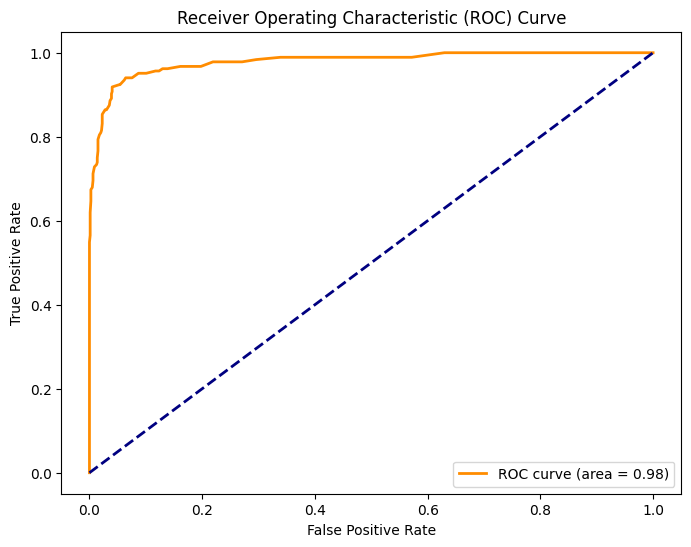

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()